# Explore here

In [138]:
# Your code here
# RECOPILACION DE DATOS Y PLANTEMIENTO DEL PROBLEMA

import pandas as pd

datos = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv')
datos

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [139]:
# EXPLORACION Y LIMPIEZA DE DATOS
datos.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


1. 3 columnas de texto
2. 4 columnas numericas
3. sin datos nulos

In [140]:
datos.drop(['age','sex'], axis =1).duplicated().sum()

np.int64(1)

In [141]:
# Eliminamos la fila duplicada
datos = datos.drop_duplicates()
datos.info()

<class 'pandas.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   str    
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   str    
 5   region    1337 non-null   str    
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 83.6 KB


In [142]:
# ELiminado de informacion irrelevante

datos = datos.drop(['region'], axis = 1)
datos.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


# ANALISIS UNIVARIANTE

[Text(0, 0.5, '')]

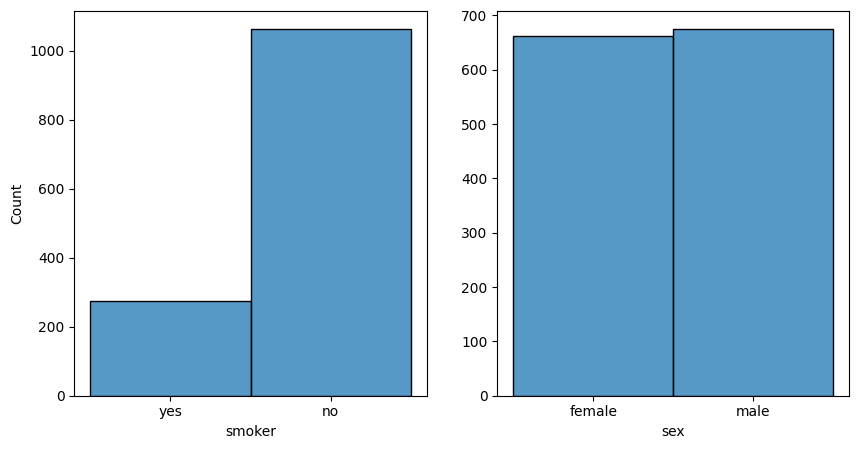

In [143]:
# CATEGORICO

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.histplot(ax = ax[0] ,data = datos, x = 'smoker')
sns.histplot(ax= ax[1] ,data = datos, x = 'sex').set(ylabel = None)


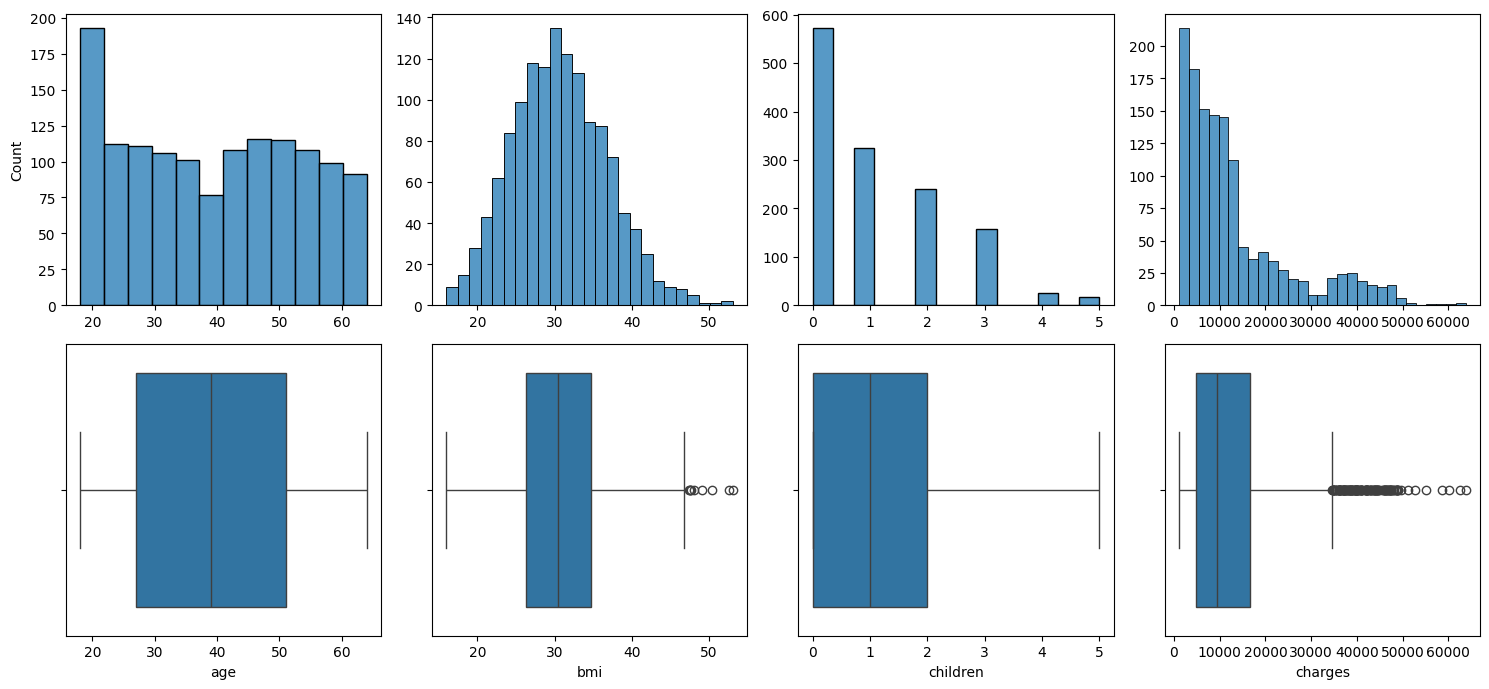

In [144]:
# Numerico

fig, ax = plt.subplots(2,4,figsize = (15,7))

sns.histplot(ax = ax[0,0], data = datos, x = 'age').set(xlabel = None)
sns.boxplot (ax = ax[1,0], data = datos, x = 'age')
sns.histplot(ax = ax[0,1], data = datos, x = 'bmi').set(xlabel = None, ylabel = None)
sns.boxplot (ax = ax[1,1], data = datos, x = 'bmi')
sns.histplot(ax = ax[0,2], data = datos, x = 'children').set(xlabel = None, ylabel = None)
sns.boxplot (ax = ax[1,2], data = datos, x = 'children')
sns.histplot(ax = ax[0,3], data = datos, x = 'charges').set(xlabel = None, ylabel = None)
sns.boxplot (ax = ax[1,3], data = datos, x = 'charges')

plt.tight_layout()
plt.show()

# ANALISIS MULTIVARIANTE

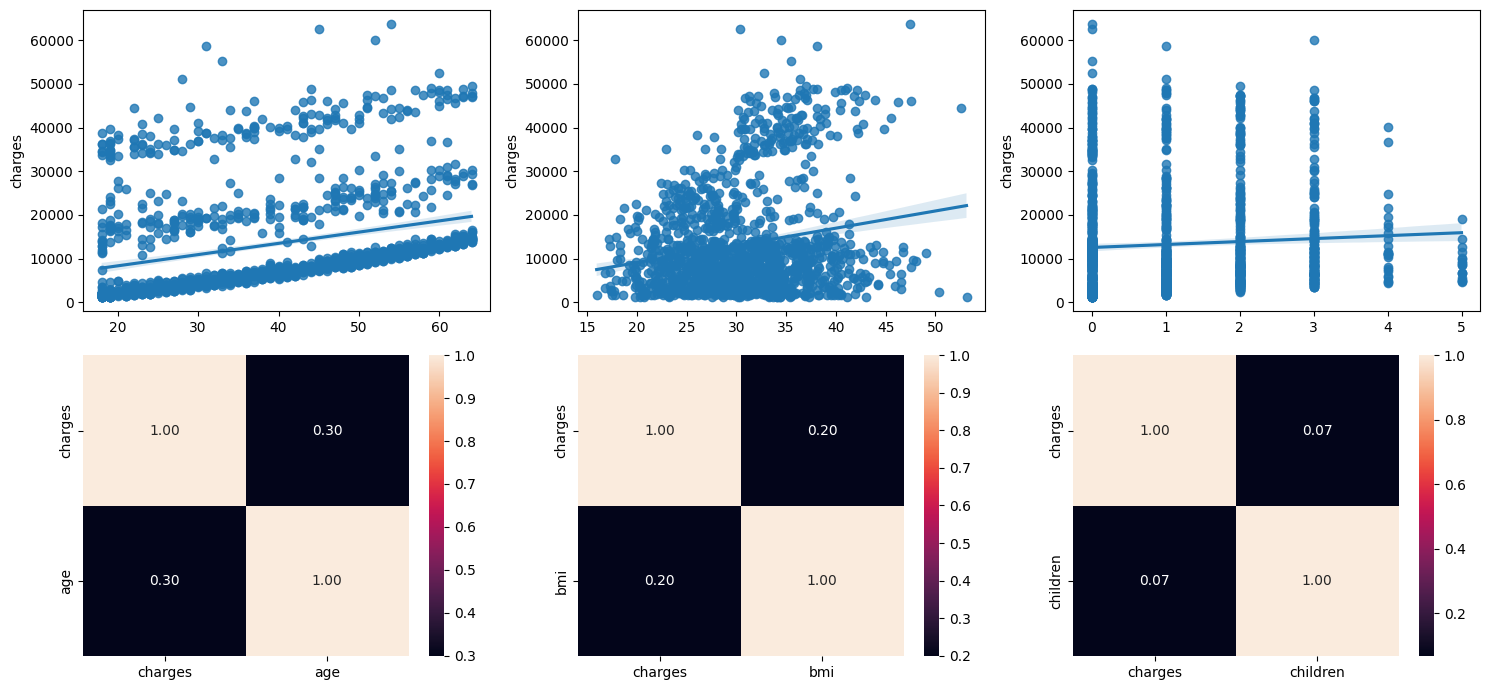

In [145]:
# NUMERICO - NUMERICO

fig ,ax = plt.subplots(2,3,figsize = (15,7))

sns.regplot(ax = ax[0,0], data = datos, x = 'age', y = 'charges').set(xlabel = None)
sns.heatmap(datos[['charges','age']].corr(), annot= True, fmt = ".2f", ax = ax[1,0]) 
sns.regplot(ax = ax[0,1], data = datos, x = 'bmi', y = 'charges').set(xlabel = None)
sns.heatmap(datos[['charges','bmi']].corr(), annot= True, fmt = ".2f", ax = ax[1,1]) 
sns.regplot(ax = ax[0,2], data = datos, x = 'children', y = 'charges').set(xlabel = None)
sns.heatmap(datos[['charges','children']].corr(), annot= True, fmt = ".2f", ax = ax[1,2]) 

plt.tight_layout()
plt.show()

In [146]:
# CATEGORICO - NUMERICO

datos['smoker'] = pd.factorize(datos['smoker'])[0]
datos['sex'] = pd.factorize(datos['sex'])[0]
datos.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,0,16884.92400
1,18,1,33.770,1,1,1725.55230
2,28,1,33.000,3,1,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


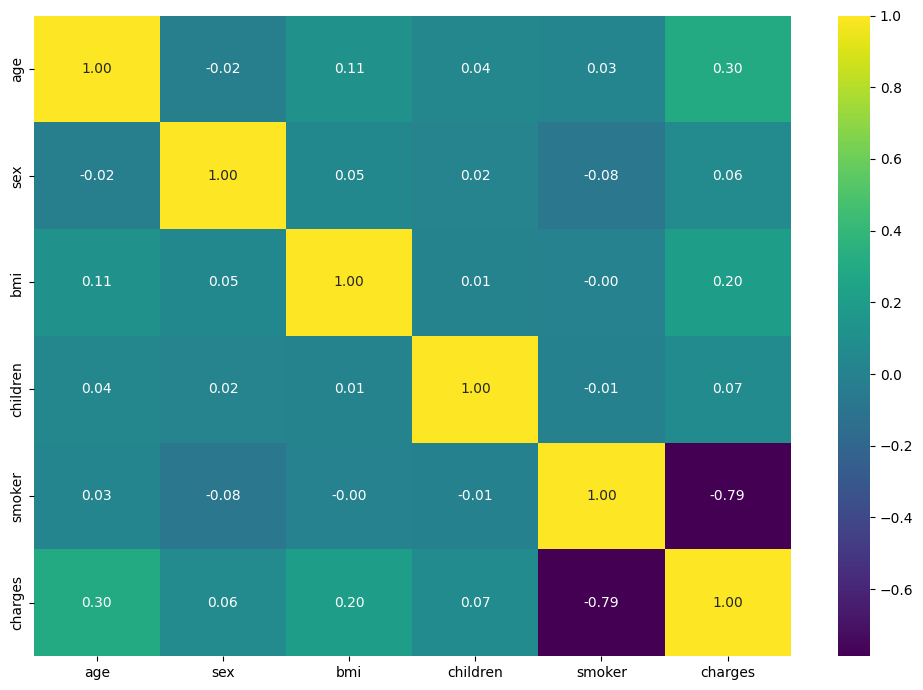

In [147]:
fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(datos.corr(method='pearson'), annot = True, fmt = '.2f',cmap= 'viridis', ax=ax)

plt.tight_layout()
plt.show()

Las mejores variables relacionadas con charges son la edad y el indice de masa. La Variable que no muestra tener relacion es si fuma o no. Por lo que se procede a retirar

In [148]:
datos = datos.drop('smoker', axis =1)
datos.head()

,age,sex,bmi,children,charges
0,19,0,27.900,0,16884.92400
1,18,1,33.770,1,1725.55230
2,28,1,33.000,3,4449.46200
3,33,1,22.705,0,21984.47061
4,32,1,28.880,0,3866.85520


# Ingenieria de Caracteristicas

In [149]:
# Analisis de Outliers
datos.describe()

,age,sex,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,13279.121487
std,14.044333,0.500163,6.100468,1.205571,12110.359656
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,63770.428010


Segun los boxplot, las variables con outliers son: el indice de masa y el seguro medico.

In [150]:
# Los outliers que se comienzan a dispersar es a partir de los 55000

datos[datos['charges']>55000]

,age,sex,bmi,children,charges
543,54,0,47.410,0,63770.42801
577,31,0,38.095,1,58571.07448
819,33,0,35.530,0,55135.40209
1230,52,1,34.485,3,60021.39897
1300,45,1,30.360,0,62592.87309


Las primas pueden representar un error y ya que no representan un 

In [151]:
charges_stats = datos['charges'].describe()
charges_iqr = charges_stats['75%']-charges_stats['25%']
upper_limit = charges_stats['75%']+1.5*charges_iqr
lower_limit = charges_stats['25%']-1.5*charges_iqr

print(f'Los rangos superior e inferios son: {round(upper_limit,2)} y {round(lower_limit,2)}, con un rango intercuartilico de: {round(charges_iqr,2)} ')

Los rangos superior e inferios son: 34524.78 y -13120.72, con un rango intercuartilico de: 11911.37 


A pesar de que el limite superor es 34mil los outliers en el boxplot estan distribuidos de forma continua hasta aproximadamente 50mil. Por lo que el limite sera 50mil

In [152]:
datos['charges'] = datos['charges'].astype(float)
datos = datos[datos['charges']<50000]
datos.info()

<class 'pandas.DataFrame'>
Index: 1330 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1330 non-null   int64  
 1   sex       1330 non-null   int64  
 2   bmi       1330 non-null   float64
 3   children  1330 non-null   int64  
 4   charges   1330 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 62.3 KB


In [153]:
# Analisis de Valores Faltantes

datos.isnull().sum()

age         0
sex         0
bmi         0
children    0
charges     0
dtype: int64

no existen valores nulos

In [154]:
# Escalado de valores

from sklearn.preprocessing import MinMaxScaler
'''C = ['age','bmi','children','sex']
D = datos[C]
scaler_minmax = MinMaxScaler()
datos_escalados = pd.DataFrame(scaler_minmax.fit_transform(D), index= datos.index , columns= C)
datos_escalados'''



"C = ['age','bmi','children','sex']\nD = datos[C]\nscaler_minmax = MinMaxScaler()\ndatos_escalados = pd.DataFrame(scaler_minmax.fit_transform(D), index= datos.index , columns= C)\ndatos_escalados"

In [155]:
'''datos_escalados['charges'] = datos['charges']
datos_escalados.head()'''

"datos_escalados['charges'] = datos['charges']\ndatos_escalados.head()"

In [156]:
# Seleccion de Caracteristicas

from sklearn.feature_selection import f_regression,SelectKBest
from sklearn.model_selection import train_test_split

x = datos.drop('charges', axis=1)
y = datos['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
x_train_esc = scaler.fit_transform(x_train)
x_test_esc  = scaler.transform(x_test)

x_train_esc = pd.DataFrame(x_train_esc, index = x_train.index, columns = x_train.columns)
x_test_esc = pd.DataFrame(x_test_esc, index = x_test.index, columns = x_test.columns)




# INICIALIZACION DEL MODELO

In [157]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_esc,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [158]:
y_pred = model.predict(x_test_esc)
y_pred

array([ 8760.94806702, 22576.4716101 , 13961.49296372, 12921.59207964,
        4554.17276406,  6961.85564345, 16934.7955734 ,  5269.04201683,
       16605.72069159,  6952.36390797,  7179.48683899, 15943.7216859 ,
        9285.0637475 ,  7534.50599628,  9491.63084334, 13209.54049949,
       15338.80963382, 14255.82090258, 15225.82443555, 10759.73938202,
        6540.43766793, 13924.89739292,  8334.87199874,  7952.73691904,
       13954.91847563, 11045.29380243, 12422.34197512, 13776.4282261 ,
       19029.21709453, 11160.91295908, 14266.91188098, 12714.36013341,
       11166.37353114,  7473.6392279 ,  8207.92456586, 10072.02733122,
       17038.56761358, 13880.34658036,  6130.33417837, 16677.68716695,
       20796.61972178,  5656.22150572, 12739.0105786 , 14984.57585047,
       17891.96291829, 12662.69513344, 17259.91076961,  7179.48683899,
        7715.47887181, 11450.20150702,  6204.17140523, 14685.45991274,
       19339.69045754,  8203.43159575, 12751.99312417,  4032.26781027,
      

In [159]:
from sklearn.metrics import r2_score, mean_squared_error

R2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f'Mi R2 es: {R2}')
print(f'Mi error cuadratico es: {mse}')

Mi R2 es: 0.09309859557256772
Mi error cuadratico es: 127601069.7974982
